In [ ]:
#Mount drive

from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Function to load the image
def load_image(file_path):
    img = Image.open(file_path)
    return np.array(img)

In [ ]:
# Function to display the image
def display_image(image):
    plt.imshow(image.astype(np.uint8))  # Ensure pixel values are integers
    plt.axis('off')
    plt.show()

In [ ]:
# Function to implement K-means clustering
def k_means_clustering(image, k, max_iterations=100):
    # Flatten the image
    pixels = image.reshape((-1, 3))
    # Initialize centroids randomly
    centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Assign each pixel to the closest centroid
        distances = np.sqrt(((pixels - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([pixels[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Assign each pixel to its representative mean value
    compressed_image = centroids[labels]

    return compressed_image.reshape(image.shape).astype(np.uint8)  # Ensure pixel values are integers


In [ ]:
# Function to calculate the cost (total within-cluster variation)
def calculate_cost(image, centroids, labels):
    pixels = image.reshape((-1, 3))
    total_cost = 0
    for i, centroid in enumerate(centroids):
        cluster_pixels = pixels[labels == i]
        if len(cluster_pixels) > 0:
            total_cost += np.sum((cluster_pixels - centroid) ** 2)
    return total_cost

In [ ]:
# Function to apply the elbow method and find the optimal K
def elbow_method(image, max_k=25, max_iterations=100):
    costs = []
    for k in range(1, max_k+1):
        pixels = image.reshape((-1, 3))
        centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]

        for _ in range(max_iterations):
            # Assign each pixel to the closest centroid
            distances = np.sqrt(((pixels - centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)

            # Update centroids
            new_centroids = np.array([pixels[labels == i].mean(axis=0) for i in range(k)])

            # Check for convergence
            if np.allclose(centroids, new_centroids):
                break

            centroids = new_centroids

        # Calculate cost without generating compressed image
        cost = calculate_cost(image, centroids, labels)
        costs.append(cost)
    return costs


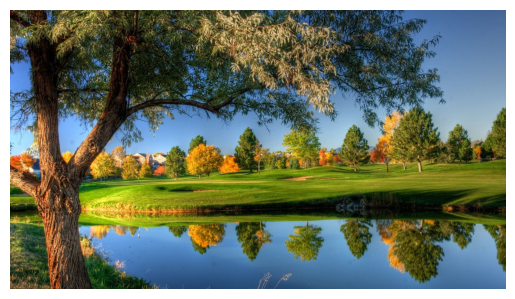

In [ ]:
# Load the image
image = load_image('/content/drive/MyDrive/Nature-.jpg')

# Display the original image
display_image(image)

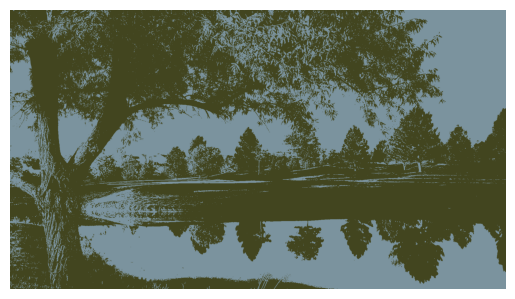

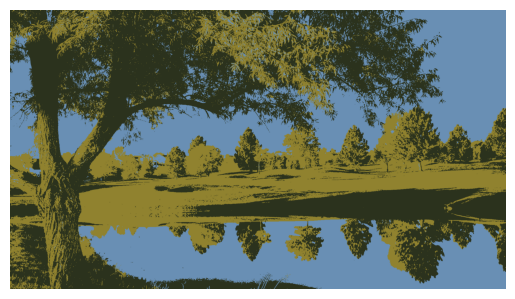

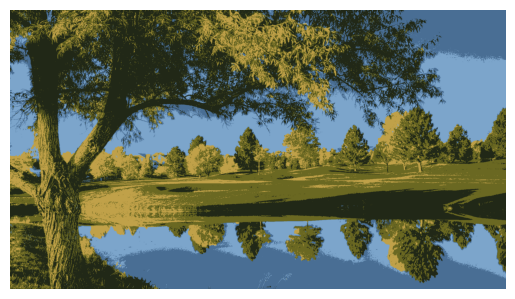

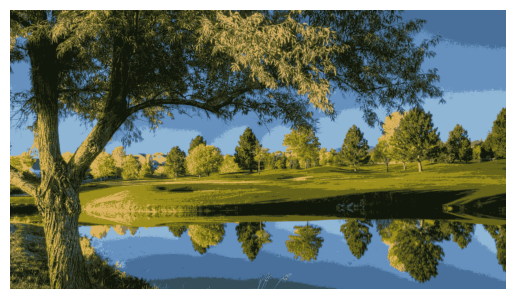

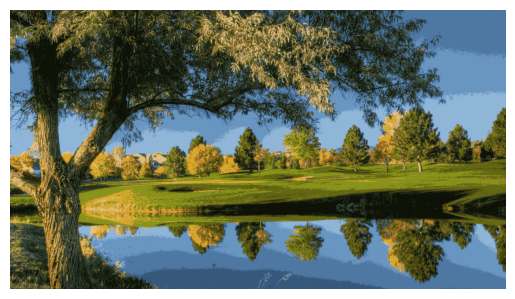

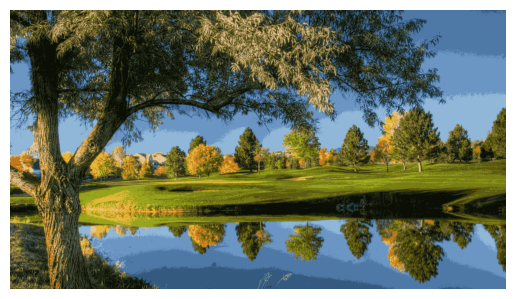

In [ ]:
# Define K values
k_values = [2, 3, 5, 10, 15, 20]

# Apply K-means clustering for each K value
for k in k_values:
    compressed_image = k_means_clustering(image, k)
    # Display the compressed image
    display_image(compressed_image)


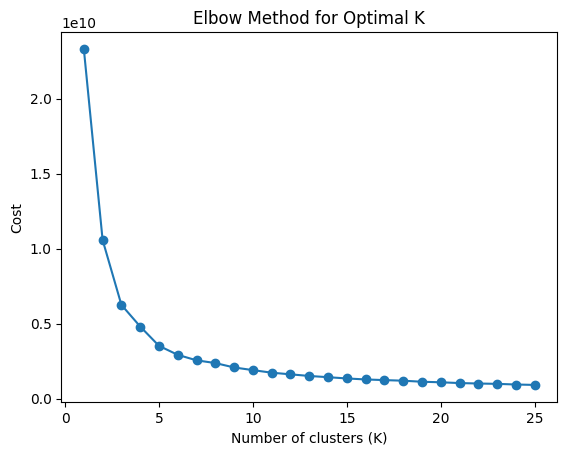

In [ ]:
# Apply elbow method to find optimal K
costs = elbow_method(image)
# Plot the cost for each K value
plt.plot(range(1, len(costs) + 1), costs, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K')
plt.show()